---

#  Mplfinance Used To Plot Supertrend

---

### What is Supertend
- It is a trend-following indicator. The Supertrend indicator was created by Olivier Seban to work on different time frames. 
- It works for futures, forex and equities. You can run it every 15 minutes, hourly, weekly, or daily.

---

### mplfinance 'yahoo' styles was used to customize:
- Type of Plot Use `candle`
- It Build As Signal Trend Line
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Fill Between
- Alpha
- Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [23]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [24]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read in daily data for the S&P 500 from November of 2019 

In [25]:
idf = pd.read_csv('data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


- Supertrend indicator is plotted in stock price charts for investors and highlights prominently visible trends that are shown in red when prices have dipped and green when prices have risen. 



- **This indicator works on only two parameters:**

- Periods: Traders usually use 10 periods – Average True Range number of days (ATR – yet another indicator that gives you market volatility value by decompressing the range of prices of a security for a particular time).
- Multiplier: A multiplier is a value by which ATR would be multiplied. Three multipliers are used.
- ATR plays a crucial role in this indicator since it is used to compute a value, and based on that, the degree of price volatility can be tracked. If all of these are too complex, you don’t have to worry; systems and screeners are now equipped to do the math for you in seconds – simply select the options on your computer and set up your trade strategy!

- **Here is Following Calculation:**

In [26]:
st = ta.supertrend(df['High'], df['Low'], df['Close'], length=7, multiplier=3,append=True)
super_trend_df = df.join(st).tail(190)

In [27]:
#Following Function Used To Differentiate Uptrend And Download

In [28]:
def color(super_trend):
    UP = []
    DOWN = []
    for i in range(len(super_trend)):
        if super_trend['SUPERTl_7_3.0'][i] < super_trend['Close'][i]:
            UP.append(float(super_trend['SUPERTl_7_3.0'][i]))
            DOWN.append(np.nan)
        elif super_trend['SUPERTs_7_3.0'][i] > super_trend['Close'][i]:
            DOWN.append(float(super_trend['SUPERTs_7_3.0'][i]))
            UP.append(np.nan)
        else:
            UP.append(np.nan)
            DOWN.append(np.nan)
    super_trend['up'] = UP
        
    super_trend['down'] = DOWN
    
    return super_trend

In [31]:
#Fuction Color Applied And Df Generated 
super_trend = color(super_trend_df)

In [32]:
up_super_trend = super_trend[['up']]
down_super_trend = super_trend[['down']]

---

Let's say we want to plot the Supertrend along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

---

In [33]:
ic = [
    #Supertrend
    mpf.make_addplot(up_super_trend,color = 'green',panel=0,),
    mpf.make_addplot(down_super_trend,color = '#FF8849',panel=0,),
    
]

Use a dict to specify other attributes (kwargs) for `fill_between`:
<br>
To demonstrate use of the `where` kwarg to display a holding period
<br>
`where = supertrend['up'] > supertrend['Close']`

In [34]:
#Fill Between Method Appled
fill_between_up=dict(y1=super_trend['up'].values,y2=super_trend['Low'].values,alpha=0.05,color='g')
fill_between_down=dict(y1=super_trend['down'].values,y2=super_trend['High'].values,alpha=0.05,color='r')

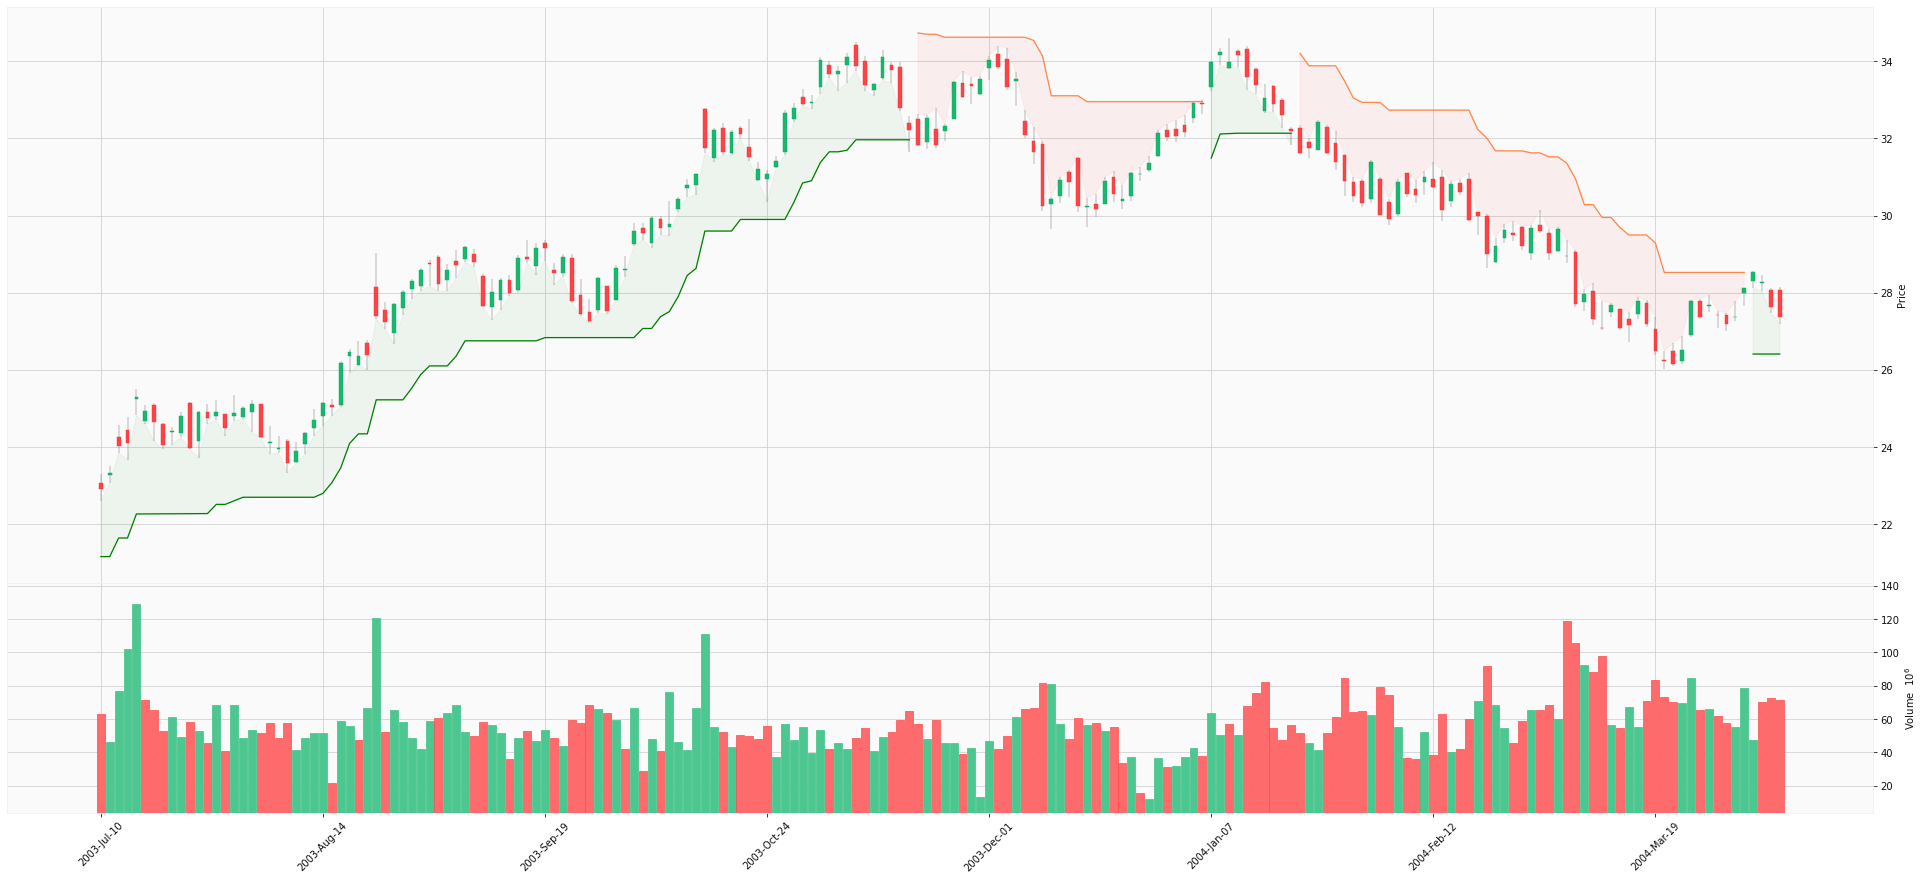

In [35]:
mpf.plot(
    super_trend,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    figscale=1.2,
    fill_between = [fill_between_up,fill_between_down],
    figsize=(36,16,)
)